In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import pandas as pd

In [2]:
X = pd.read_csv('data/chipotle_stores.csv')
X

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [3]:
X = X['longitude'].to_frame().join(X['latitude'].to_frame())

NameError: name 'db_labels' is not defined

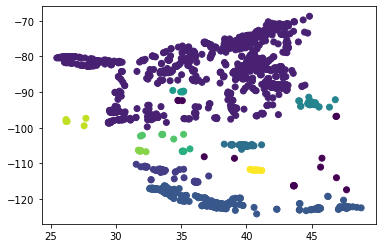

In [13]:
db = DBSCAN(eps=2,min_samples=5)
y_db = db.fit_predict(X)
labels = db.labels_
X['cluster'] = y_db

plt.scatter(X['latitude'], X['longitude'], c=X['cluster'])
plt.show()

In [15]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X['latitude'], X['longitude'], color ='r'); 
g = plt.scatter(X['latitude'], X['longitude'], color ='g'); 
b = plt.scatter(X['latitude'], X['longitude'], color ='b'); 
k = plt.scatter(X['latitude'], X['longitude'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X['latitude'], X['longitude'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

KeyError: 3

In [6]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 11
Estimated number of noise points: 15
Silhouette Coefficient: 0.105


Text(0, 0.5, 'Feature 1')

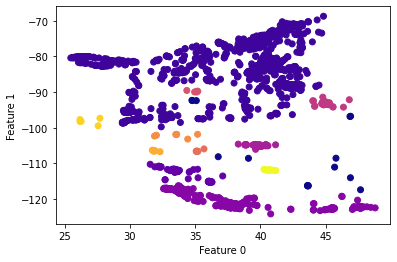

In [6]:
# plot the cluster assignments
plt.scatter(X['latitude'], X['longitude'], c=X['cluster'], cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

,P1,P2
0,0.465972,-0.930176
1,0.467558,-0.929618
2,0.451236,-0.935221
3,0.468647,-0.929233
4,0.408135,-0.948530
...,...,...
2624,-0.695313,0.571079
2625,-0.679199,0.594344
2626,-0.425713,0.841566
2627,-0.423533,0.843037


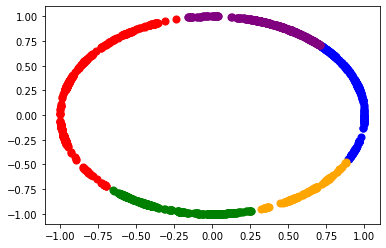

In [9]:
from sklearn.cluster import AgglomerativeClustering

X = pd.read_csv('data/chipotle_stores.csv')
X = X[['latitude','longitude']]
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X = normalize(X_scaled) 
  
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model = model.fit(X)
labels = model.labels_


plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

plt.show()